Accuracy: 0.9425837320574163
Confusion Matrix:
 [[250  16]
 [  8 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.90      0.95      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



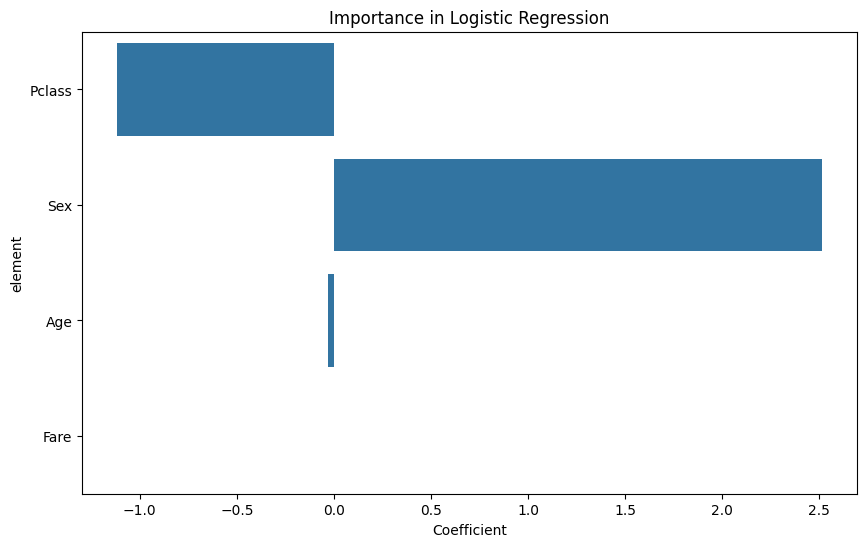

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
test_data = pd.read_csv('./test.csv')
gender_submission = pd.read_csv('./gender_submission.csv')
train_data = pd.read_csv('./train.csv')

# データの前処理
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# 特徴量と正解ラベル
X_test = test_data[['Pclass', 'Sex', 'Age', 'Fare']]
y_test = gender_submission['Survived']

# データの前処理
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

# 特徴量と正解ラベル
X_train = train_data[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = train_data['Survived']

# ロジスティック回帰モデルの訓練
model = LogisticRegression()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 評価
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 特徴量の重要度を表示
feature_importance = pd.DataFrame({'element': X_train.columns, 'Coefficient': model.coef_[0]})
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='element', data=feature_importance)
plt.title('Importance in Logistic Regression')
plt.show()